In [76]:
import tradingeconomics as te
import matplotlib.pyplot as plt
import pandas as pd

In [77]:
te.login('jupyter:jupyter'); # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

In [78]:
raw_hist_general_df = te.getHistoricalEurostat(ID = '78963', initDate = '2018-01-01', endDate = '2021-12-31', output_type = 'df')
raw_hist_general_df.head()

,ID,Date,Value,LastUpdate
0,78963,2021-05-31T00:00:00,90.94,2021-06-17T11:40:00
1,78963,2021-04-30T00:00:00,89.68,2021-05-19T11:43:00
2,78963,2021-03-31T00:00:00,90.09,2021-04-16T12:11:00
3,78963,2021-02-28T00:00:00,89.51,2021-03-17T11:31:00
4,78963,2021-01-31T00:00:00,91.31,2021-02-23T11:46:00


In [79]:
raw_hist_air_df=te.getHistoricalEurostat(ID = '75708', initDate = '2018-01-01', endDate = '2021-12-31', output_type = 'df')
raw_hist_air_df.head()

,ID,Date,Value,LastUpdate
0,75708,2021-05-31T00:00:00,83.14,2021-06-17T11:38:00
1,75708,2021-04-30T00:00:00,76.41,2021-05-19T11:41:00
2,75708,2021-03-31T00:00:00,85.46,2021-04-16T12:08:00
3,75708,2021-02-28T00:00:00,82.28,2021-03-17T11:30:00
4,75708,2021-01-31T00:00:00,91.91,2021-02-23T11:45:00


In [80]:
raw_hist_train_df=te.getHistoricalEurostat(ID = '78493', initDate = '2018-01-01', endDate = '2021-12-31', output_type = 'df')
raw_hist_train_df.head()

,ID,Date,Value,LastUpdate
0,78493,2021-05-31T00:00:00,96.53,2021-06-17T11:40:00
1,78493,2021-04-30T00:00:00,96.53,2021-05-19T11:43:00
2,78493,2021-03-31T00:00:00,96.53,2021-04-16T12:11:00
3,78493,2021-02-28T00:00:00,96.53,2021-03-17T11:31:00
4,78493,2021-01-31T00:00:00,96.46,2021-02-23T11:46:00


In [81]:
raw_hist_bus_df=te.getHistoricalEurostat(ID = '77769', initDate = '2018-01-01', endDate = '2021-12-31', output_type = 'df')
raw_hist_bus_df.head()

,ID,Date,Value,LastUpdate
0,77769,2021-05-31T00:00:00,90.58,2021-06-17T11:39:00
1,77769,2021-04-30T00:00:00,90.57,2021-05-19T11:43:00
2,77769,2021-03-31T00:00:00,90.56,2021-04-16T12:11:00
3,77769,2021-02-28T00:00:00,90.58,2021-03-17T11:30:00
4,77769,2021-01-31T00:00:00,90.67,2021-02-23T11:46:00


In [82]:
raw_hist_underground_df=te.getHistoricalEurostat(ID = '85533', initDate = '2018-01-01', endDate = '2021-12-31', output_type = 'df')
raw_hist_underground_df.head()

,ID,Date,Value,LastUpdate
0,85533,2021-05-31T00:00:00,91.86,2021-06-17T11:42:00
1,85533,2021-04-30T00:00:00,91.86,2021-05-19T11:47:00
2,85533,2021-03-31T00:00:00,91.86,2021-04-16T12:15:00
3,85533,2021-02-28T00:00:00,91.86,2021-03-17T11:33:00
4,85533,2021-01-31T00:00:00,91.86,2021-02-23T11:49:00


In [84]:
general_df = raw_hist_general_df[['Date', 'Value']].rename(columns = {'Value': 'General'}).set_index('Date')
air_df = raw_hist_air_df[['Date', 'Value']].rename(columns = {'Value': 'Air'}).set_index('Date')
train_df = raw_hist_train_df[['Date', 'Value']].rename(columns = {'Value': 'Train'}).set_index('Date')
bus_df = raw_hist_bus_df[['Date', 'Value']].rename(columns = {'Value': 'Bus'}).set_index('Date')
underground_df = raw_hist_underground_df[['Date', 'Value']].rename(columns = {'Value': 'Underground'}).set_index('Date')
df = pd.merge(pd.merge(air_df, train_df, on ='Date'), bus_df, on='Date')
df = pd.merge(pd.merge(df, underground_df, on='Date'), general_df, on='Date')
df['formatted_date'] = pd.to_datetime(df.index)
df=df.reindex(df['formatted_date'])
del df['formatted_date']
df.head()


,Air,Train,Bus,Underground,General
formatted_date,,,,,
2021-05-31,NaN,NaN,NaN,NaN,NaN
2021-04-30,NaN,NaN,NaN,NaN,NaN
2021-03-31,NaN,NaN,NaN,NaN,NaN
2021-02-28,NaN,NaN,NaN,NaN,NaN
2021-01-31,NaN,NaN,NaN,NaN,NaN


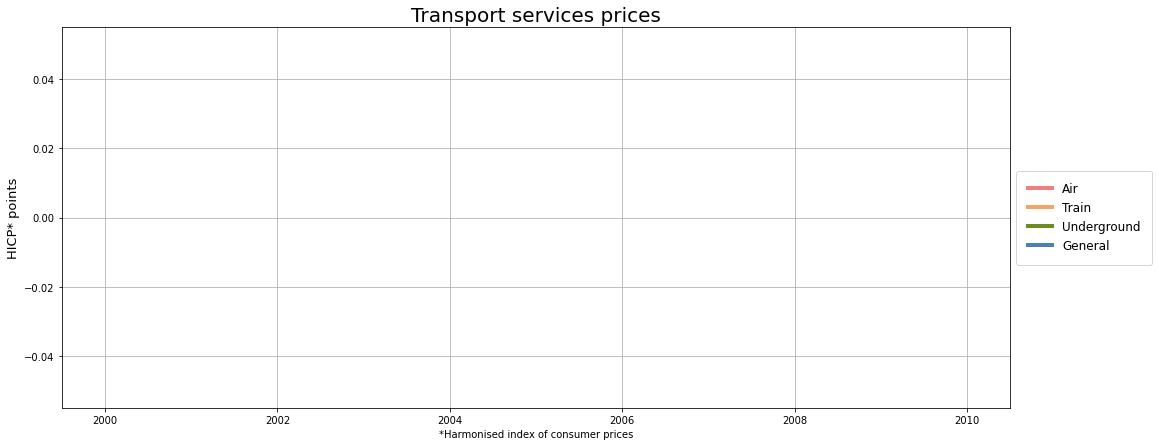

In [85]:
plt.subplots(figsize=(17, 7))

plt.plot( df.index.tolist(), df['Air'].values.tolist(), color='lightcoral', linewidth=4, label="Air")
plt.plot( df.index.tolist(), df['Train'].values.tolist(), color='sandybrown', linewidth=4, label="Train")
plt.plot( df.index.tolist(), df['Underground'].values.tolist(),  color='olivedrab', linewidth=4, label="Underground")
plt.plot( df.index.tolist(), df['General'].values.tolist(),  color='steelblue', linewidth=4, label="General")

plt.legend(
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=12,
          ncol=1,
          title_fontsize=14,
          borderpad=1)
plt.grid(True)
plt.ylabel('HICP* points', fontsize=13)
plt.xlabel('*Harmonised index of consumer prices', fontsize=10)
plt.title("Transport services prices", size=20)
plt.show()